In [3]:
import snapatac2 as snap
import pandas as pd
import os
from os.path import join as pjoin
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

figdir=os.path.expanduser('/allen/programs/celltypes/workgroups/rnaseqanalysis/HMBA/Aim1_Atlases/BasalGanglia_paper_package/analysis/de_mts/neu')


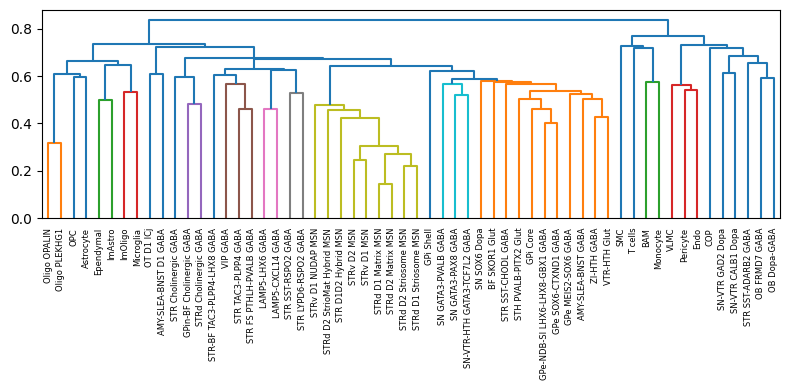

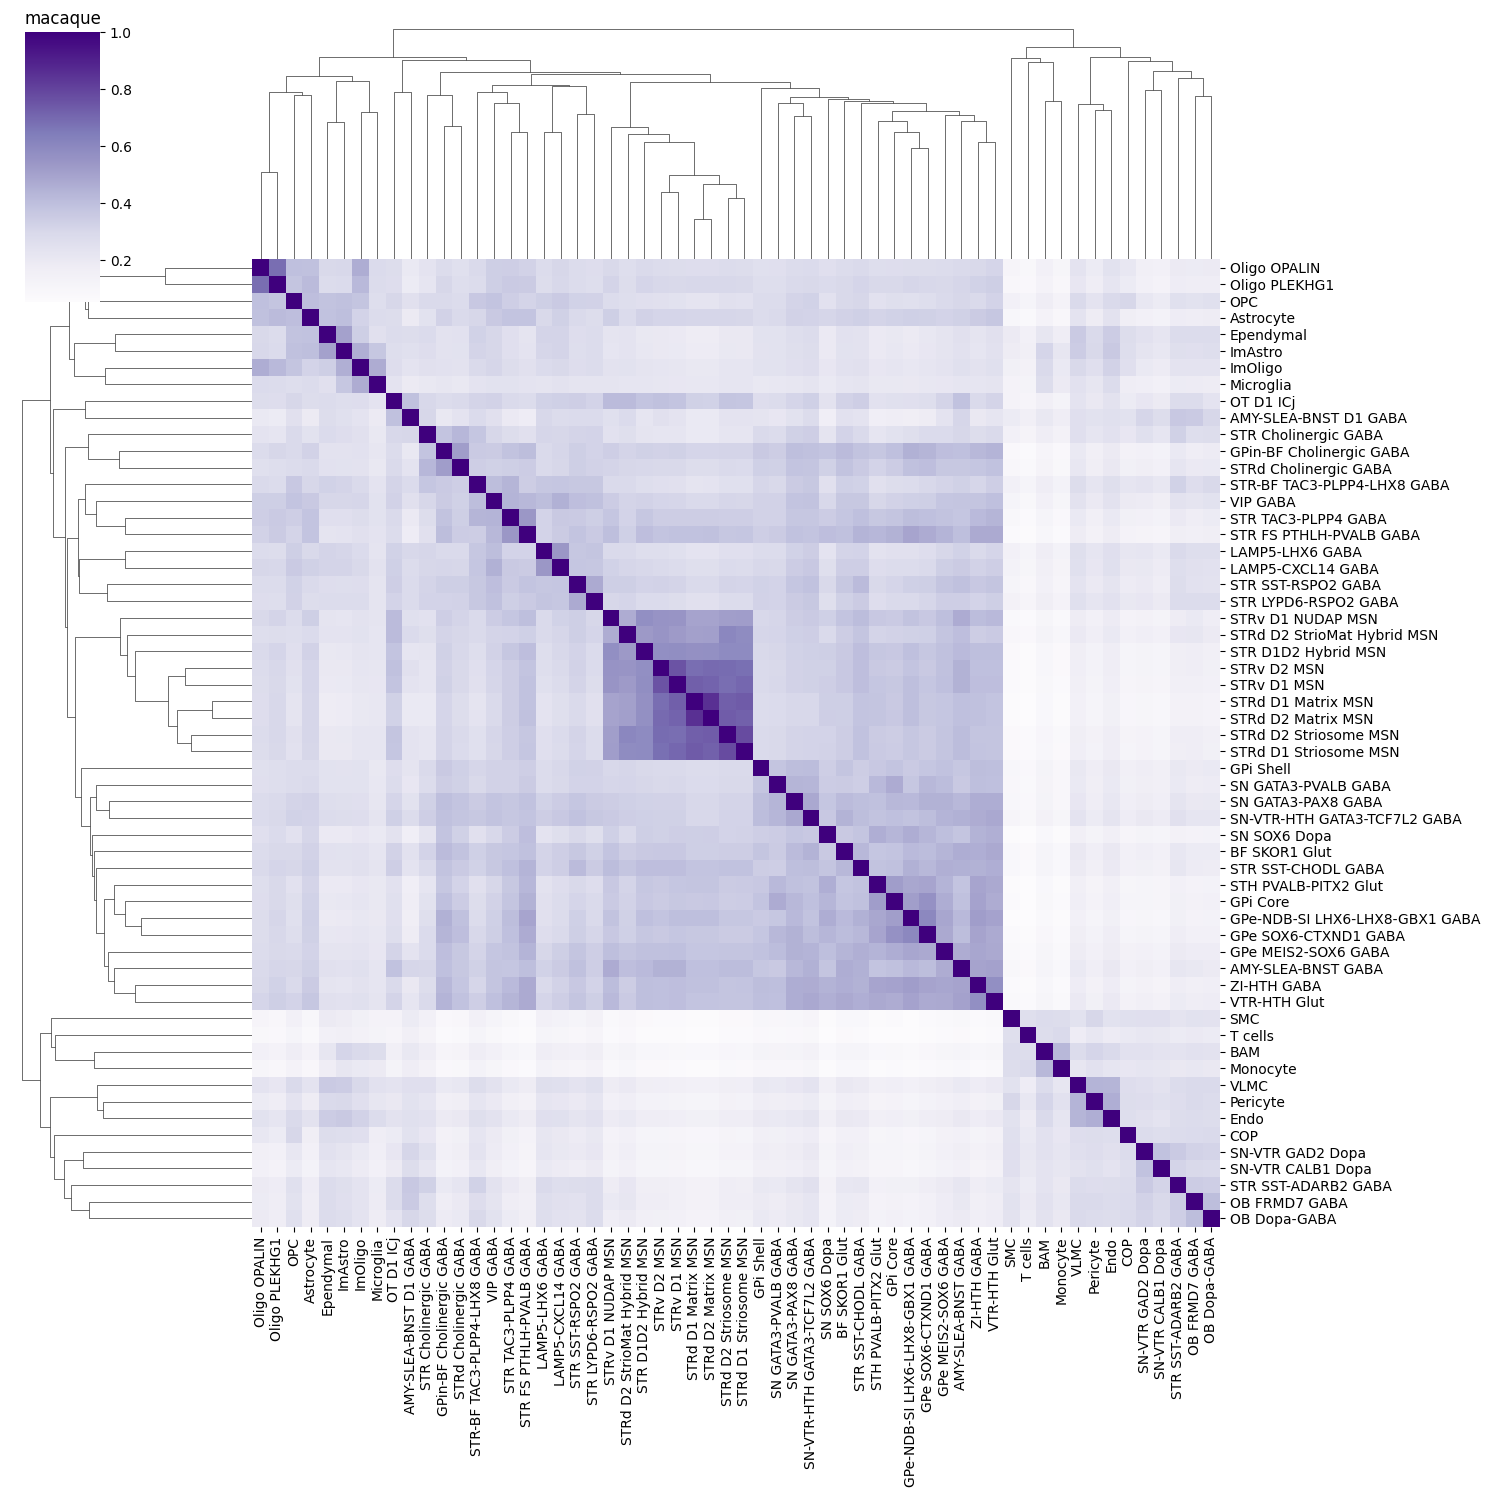

/scratch/fast/4386645/ipykernel_1644160/2748360997.py:106: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


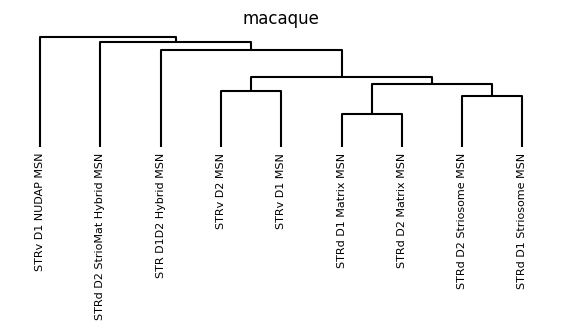

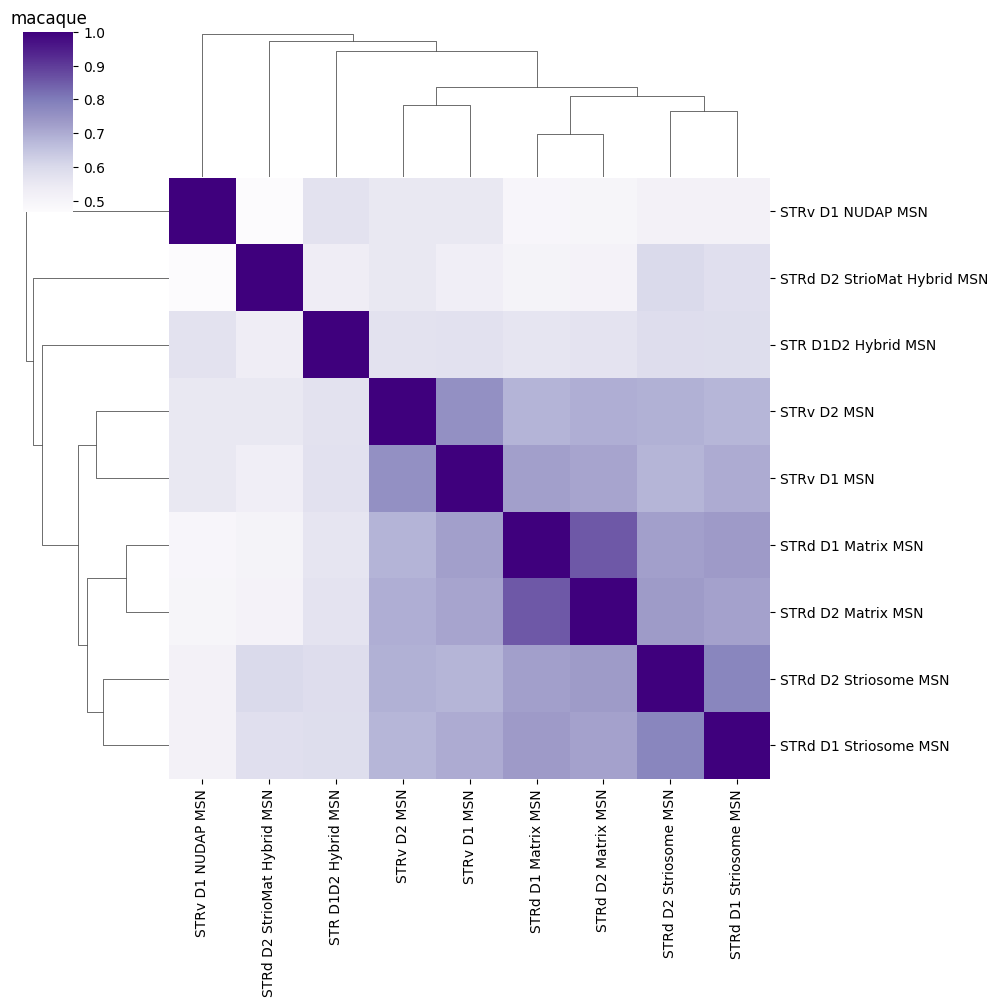

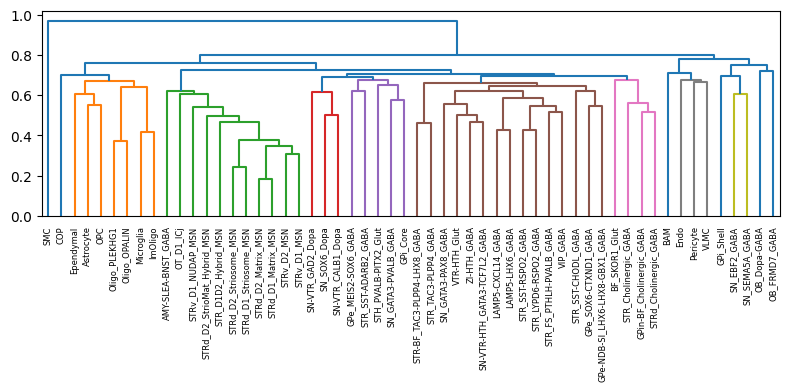

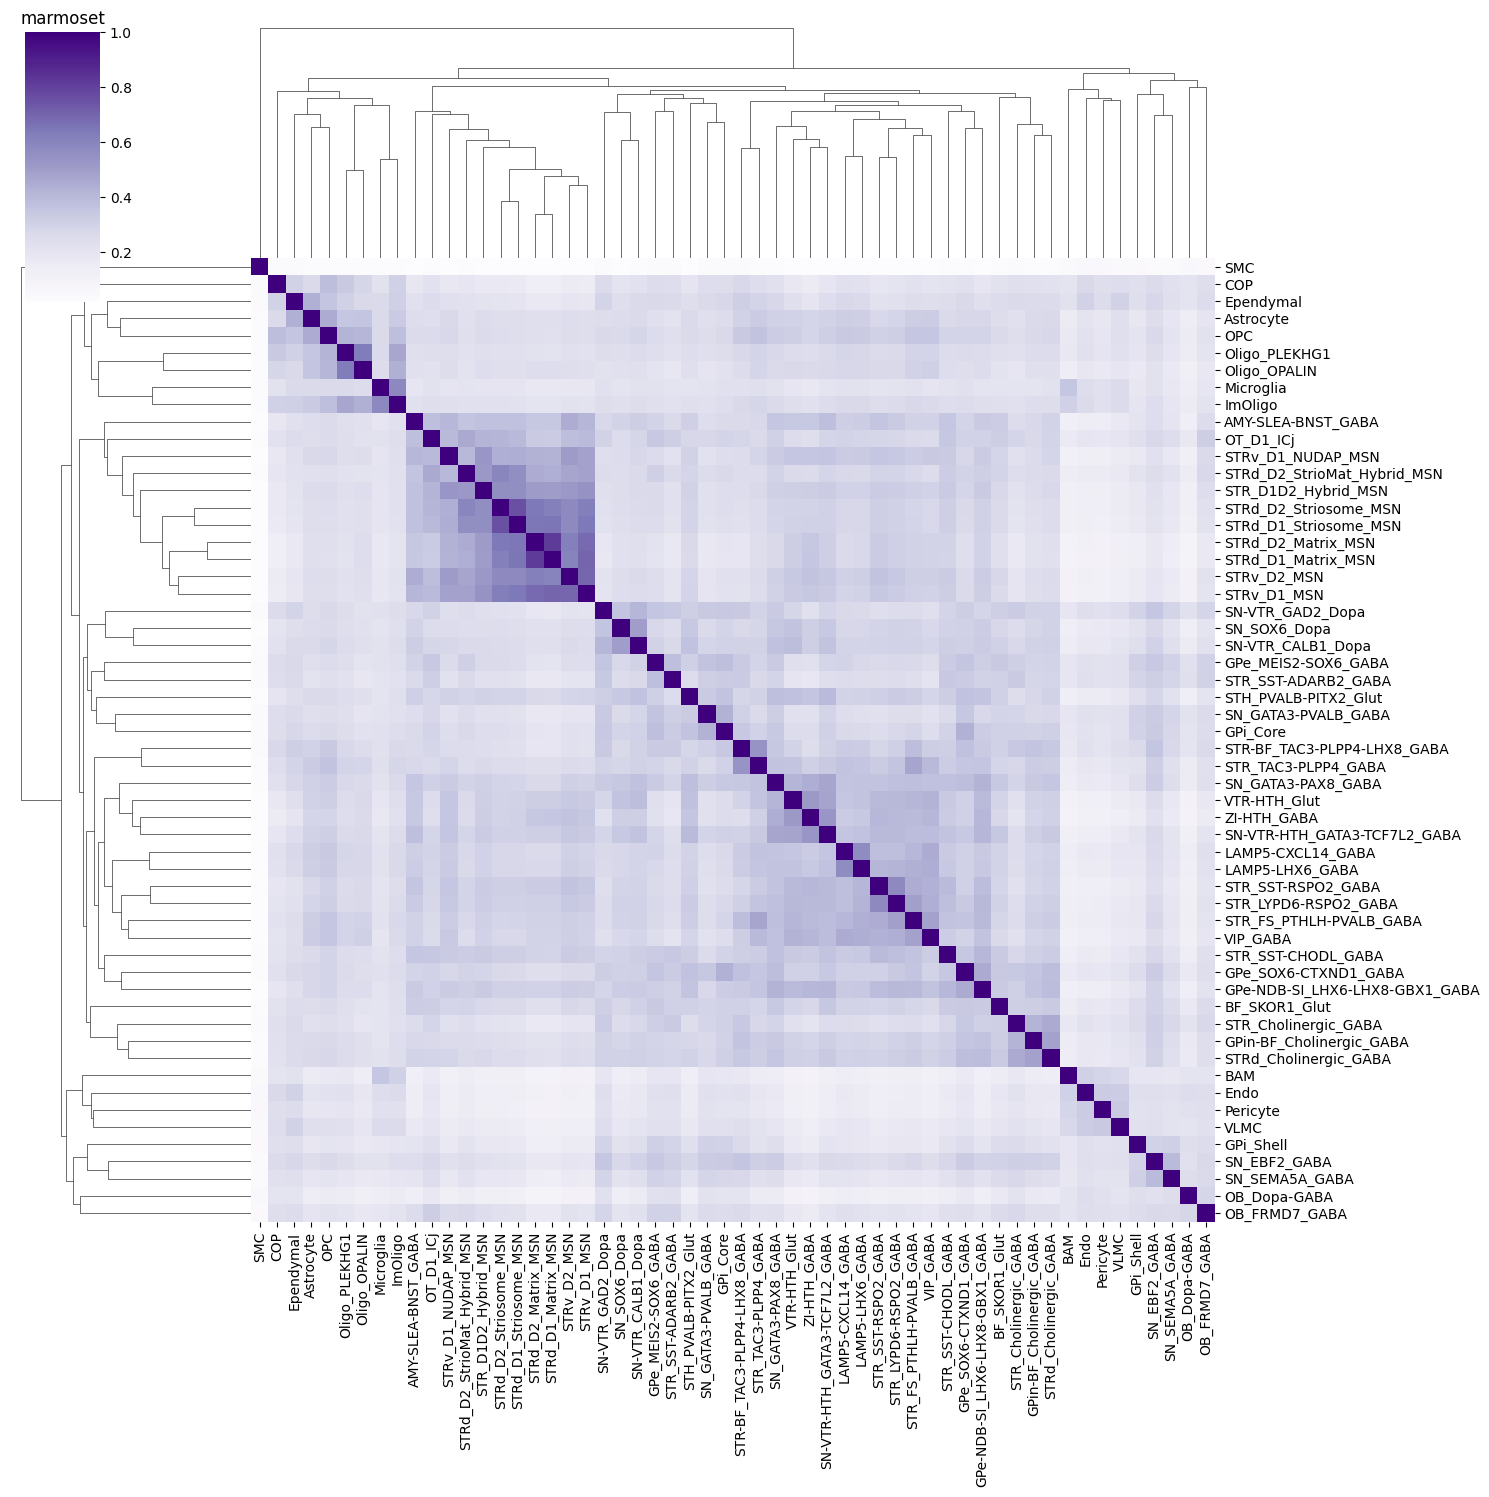

/scratch/fast/4386645/ipykernel_1644160/2748360997.py:106: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


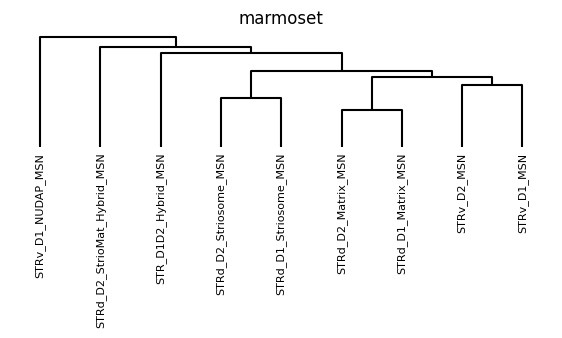

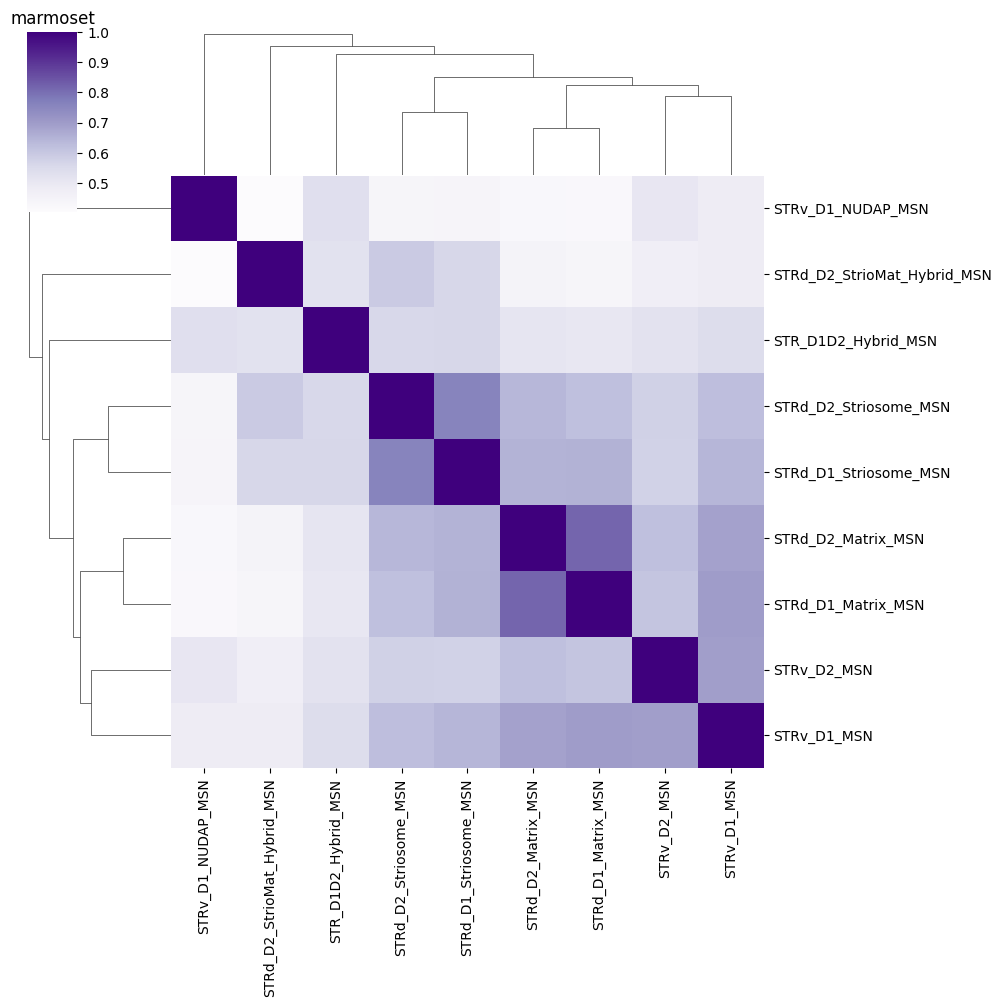

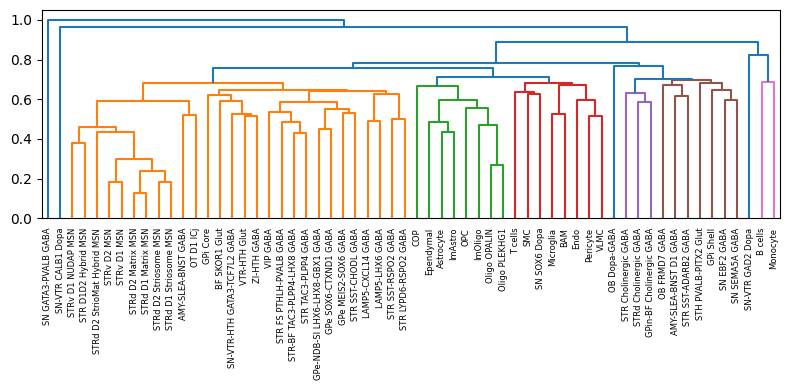

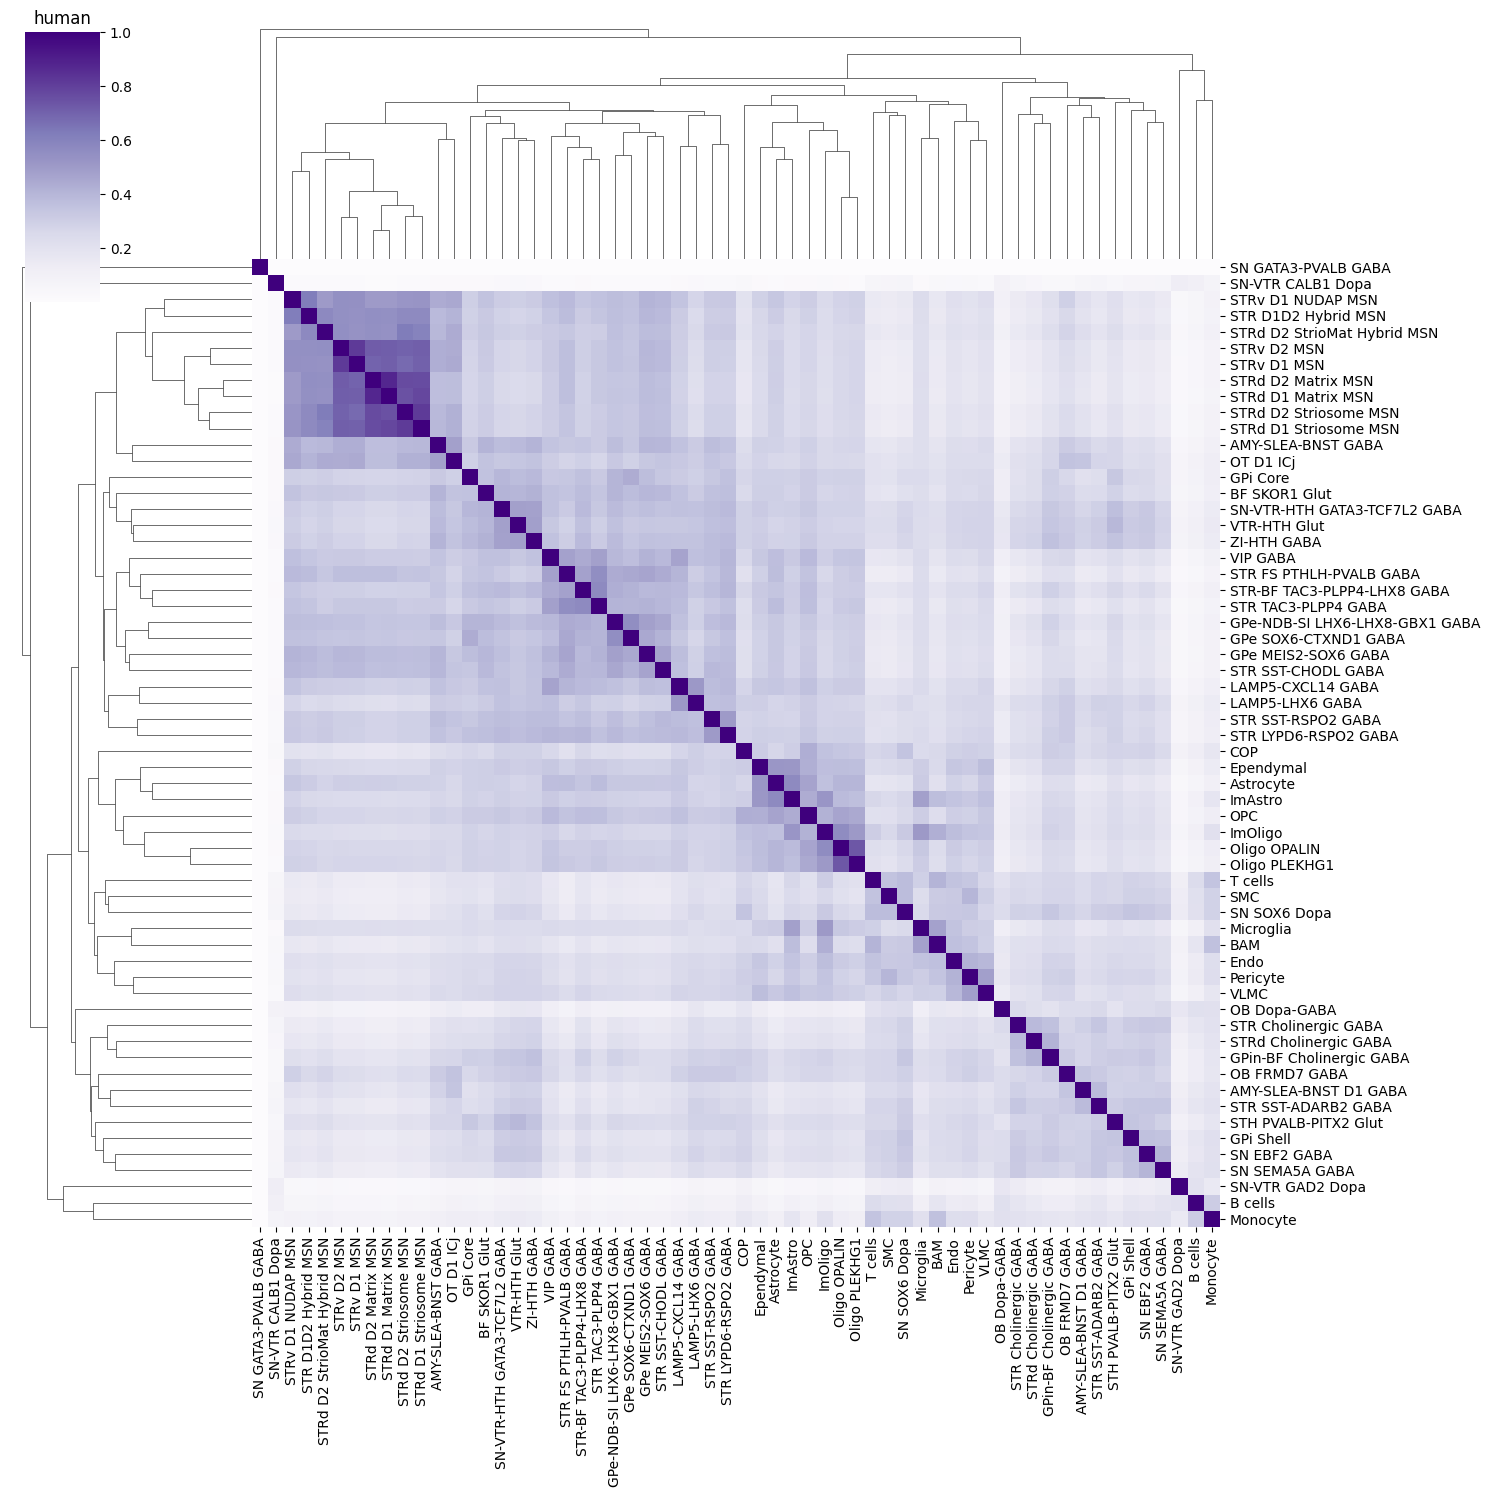

/scratch/fast/4386645/ipykernel_1644160/2748360997.py:106: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


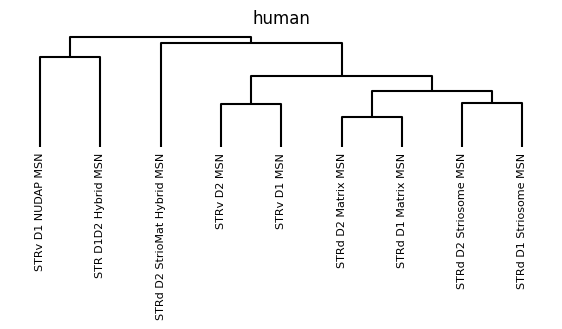

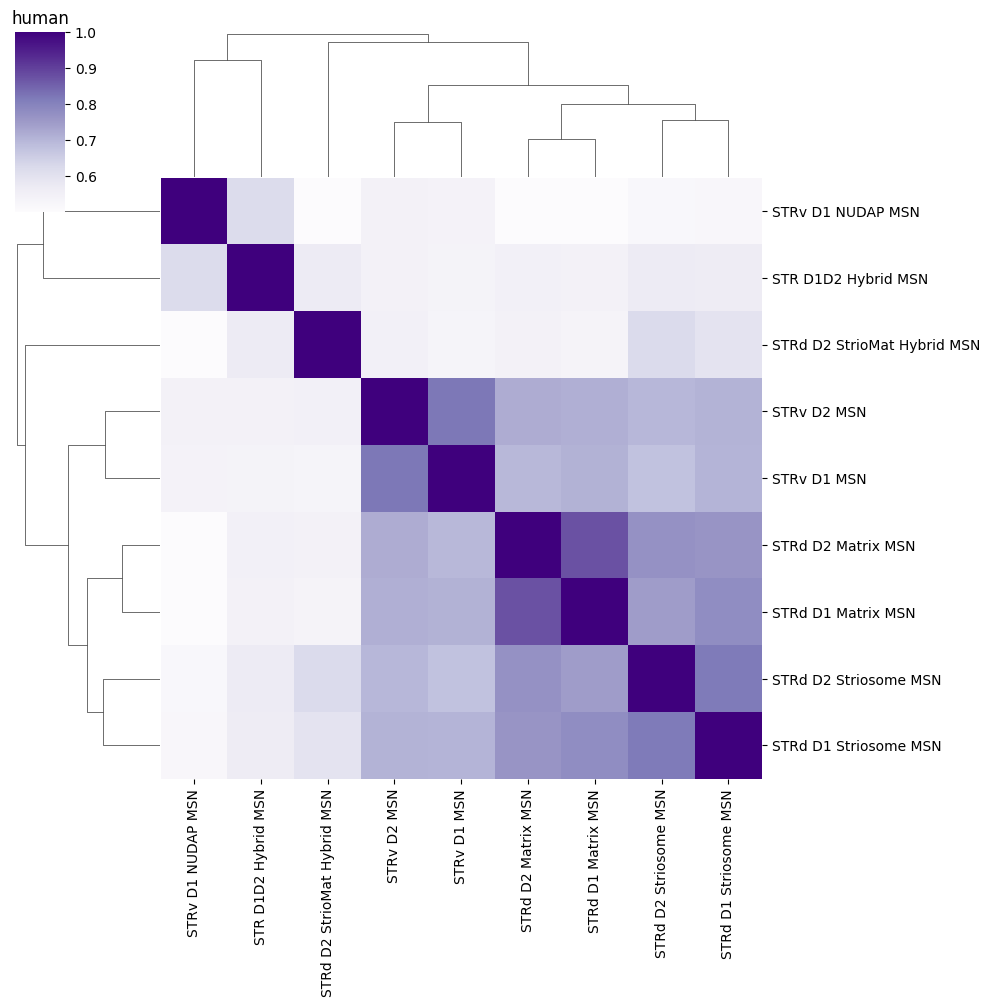

In [14]:
species_list = ['macaque','marmoset','human']
peak_groups = {}
for species in species_list:
    peak_dir = f"/allen/programs/celltypes/workgroups/rnaseqanalysis/HMBA/Aim1_Atlases/BasalGanglia_paper_package/data/{species}/ATAC"
    peak_group = pd.read_csv(os.path.join(peak_dir, "Group_by_peaks.csv"), index_col=0)
    peak_groups[species] = peak_group

    X = peak_group.astype(float).to_numpy()
    cols = peak_group.columns
    
    # intersections
    I = X.T @ X  # integer counts
    
    # unions
    col_sums = X.sum(axis=0)
    U = col_sums[:, None] + col_sums[None, :] - I
    
    # jaccard = I / U (0 where union==0)
    J = np.divide(I, U, out=np.zeros_like(I, dtype=float), where=U!=0)
    
    jaccard_df = pd.DataFrame(J, index=peak_group.columns, columns=peak_group.columns)
    
    M = jaccard_df.copy()
    
    # Jaccard distance
    D = 1.0 - M.to_numpy()
    np.fill_diagonal(D, 0.0)
    condensed = squareform(D, checks=False)
    
    # dendrogram (use average or complete; ward is not valid for Jaccard)
    Z = linkage(condensed, method='average')
    
    # plot the dendrogram
    plt.figure(figsize=(8, 4))
    dendrogram(Z, labels=M.index.to_list(), leaf_rotation=90)
    plt.tight_layout()
    plt.show()
    
    # plt.figure(figsize=(20,20))
    # clustermap using the same dendrogram
    g = seaborn.clustermap(
        M,
        row_linkage=Z,
        col_linkage=Z,
        xticklabels=True,
        yticklabels=True,
        cmap="Purples",
        figsize=(15,15)
    )
    outfile = os.path.join(figdir, f"clustermap_overall_{species}_atac_jaccard.pdf")
    plt.title(species)
    plt.savefig(outfile, format="pdf",bbox_inches='tight')
    plt.show()

    
    msn_types = peak_group.columns.str.contains('MSN')#&~peak_group.columns.str.contains('D1D2|NUDAP|ICj')
    msn_peaks = (peak_group.loc[:,msn_types].mean(1)>0.5) #& (peak_group.loc[:,~msn_types].mean(1)<0.2)
    non_msn_peaks = (peak_group.loc[:,msn_types].mean(1)<0.2)

    X = peak_group.astype(float).to_numpy()
    cols = peak_group.columns
    
    # intersections
    I = X.T @ X  # integer counts
    
    # unions
    col_sums = X.sum(axis=0)
    U = col_sums[:, None] + col_sums[None, :] - I
    
    # jaccard = I / U (0 where union==0)
    J = np.divide(I, U, out=np.zeros_like(I, dtype=float), where=U!=0)
    
    jaccard_df = pd.DataFrame(J, index=peak_group.columns, columns=peak_group.columns)
    
    M = jaccard_df.loc[msn_types, msn_types].copy()
    
    # Jaccard distance
    D = 1.0 - M.to_numpy()
    np.fill_diagonal(D, 0.0)
    condensed = squareform(D, checks=False)
    
    # dendrogram (use average or complete; ward is not valid for Jaccard)
    Z = linkage(condensed, method='average')
    
    # plot the dendrogram
    # plt.figure(figsize=(8, 4))
    # dendrogram(Z, labels=M.index.to_list(), leaf_rotation=90)
    # plt.tight_layout()
    # plt.show()

    fig, ax = plt.subplots(figsize=(7, 1.5))
    dendrogram(Z, labels=M.index.to_list(), leaf_rotation=90,
        leaf_font_size=8,
        above_threshold_color='k',
        link_color_func=lambda _: 'k',
        ax = ax
    )
    
    ax.get_yaxis().set_visible(False)
    ax.tick_params(axis='x', which='both', length=0)
    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.margins(y=0.02)
    plt.title(f"{species}")
    plt.tight_layout()
    outfile = os.path.join(figdir, f"dendrogram_{species}_atac_jaccard.pdf")
    plt.savefig(outfile, format="pdf",bbox_inches='tight')
    plt.show()    
    # clustermap using the same dendrogram
    g = seaborn.clustermap(
        M,
        row_linkage=Z,
        col_linkage=Z,
        xticklabels=True,
        yticklabels=True,
        cmap="Purples"
    )
    plt.title(species)
    outfile = os.path.join(figdir, f"heatmap_{species}_atac_jaccard.pdf")
    plt.show()

    # g = seaborn.heatmap(
    #     M,
    #     xticklabels=True,
    #     yticklabels=True,
    #     cmap="Purples"
    # )
    # plt.title(species)
    # plt.show()


In [398]:
peak_group = peak_groups['human']

In [399]:
# seaborn.clustermap(peak_group.loc[:,msn_types].corr(),xticklabels=True,yticklabels=True) # Jaccard with proper dendrogram is the correct way

In [254]:
msn_peaks.sum()

405546

In [255]:
(peak_group.loc[:,msn_types].mean(1)+eps)

Peaks
GL000009.2:114168-114669    0.238889
GL000009.2:115001-115502    0.016667
GL000194.1:7949-8450        0.016667
GL000194.1:21900-22401      0.350000
GL000194.1:21201-21702      0.350000
                              ...   
chrY:56871960-56872461      0.127778
chrY:56872722-56873223      0.016667
chrY:56873479-56873980      0.794444
chrY:56877483-56877984      0.016667
chrY:56879767-56880268      0.016667
Length: 1360548, dtype: float64

In [277]:
eps = 1/peak_group.shape[1]
msn_ratio = (peak_group.loc[:,msn_types].mean(1)+eps)/(peak_group.loc[:,~msn_types].mean(1)+eps)

<Axes: ylabel='Count'>

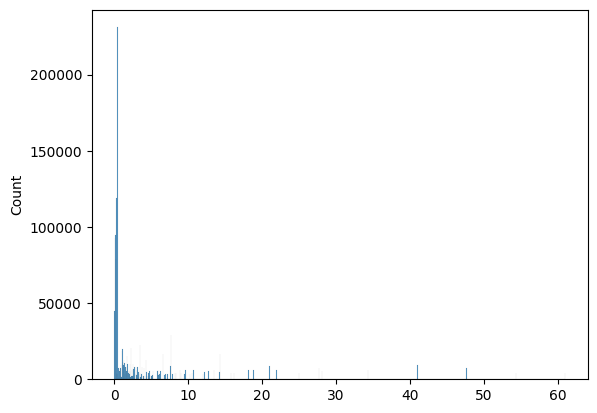

In [258]:
seaborn.histplot(msn_ratio)

In [259]:
(msn_ratio>10).sum()

139255

In [128]:
peak_group.loc[msn_ratio>10]

,Astrocyte,SMC,OB FRMD7 GABA,Microglia,SN-VTR GAD2 Dopa,Oligo OPALIN,GPi Shell,STR Cholinergic GABA,SN EBF2 GABA,B cells,...,STRd Cholinergic GABA,ZI-HTH GABA,GPin-BF Cholinergic GABA,STR SST-CHODL GABA,STRv D1 MSN,STR D1D2 Hybrid MSN,OPC,T cells,Endo,OB Dopa-GABA
Peaks,,,,,,,,,,,,,,,,,,,,,
GL000194.1:21201-21702,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
GL000194.1:23465-23966,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
GL000194.1:90691-91192,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
GL000194.1:95186-95687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
GL000194.1:98797-99298,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:26346308-26346809,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
chrY:26348651-26349152,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
chrY:56826038-56826539,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [129]:
d1_genes = pd.read_csv('/allen/programs/celltypes/workgroups/rnaseqanalysis/HMBA/Aim1_Atlases/BasalGanglia_paper_package/anno_tables/RNA/d1d2_comparison/d1-specific_Human_genes.csv',header=None)[0]
d2_genes = pd.read_csv('/allen/programs/celltypes/workgroups/rnaseqanalysis/HMBA/Aim1_Atlases/BasalGanglia_paper_package/anno_tables/RNA/d1d2_comparison/d2-specific_Human_genes.csv',header=None)[0]

In [130]:
d1_tfs = pd.read_csv('/allen/programs/celltypes/workgroups/rnaseqanalysis/HMBA/Aim1_Atlases/BasalGanglia_paper_package/anno_tables/RNA/d1d2_comparison/d1-specific_Human_tfs.csv',header=None)[0]
d2_tfs = pd.read_csv('/allen/programs/celltypes/workgroups/rnaseqanalysis/HMBA/Aim1_Atlases/BasalGanglia_paper_package/anno_tables/RNA/d1d2_comparison/d2-specific_Human_tfs.csv',header=None)[0]

In [131]:
genome_path = "/allen/programs/celltypes/workgroups/rnaseqanalysis/references/human/10x/grch38.p2/genome/"
chr_sizes = pd.read_csv(pjoin(genome_path, 'star/chrNameLength.txt'), sep='\t', header=None)
chr_sizes_dict = dict(zip(chr_sizes[0], chr_sizes[1]))
fasta_path = pjoin(genome_path, 'fasta/genome.fa') if os.path.exists(pjoin(genome_path, 'fasta/genome.fa')) else pjoin(genome_path, 'fasta/genome.fa.gz')
gtf_path = pjoin(genome_path, 'genes/genes.gtf') if os.path.exists(pjoin(genome_path, 'genes/genes.gtf')) else pjoin(genome_path, 'genes/genes.gtf.gz')

genome = snap.genome.Genome(fasta=pjoin(genome_path, fasta_path),
                            annotation=pjoin(genome_path, gtf_path),
                            chrom_sizes=chr_sizes_dict)

In [132]:
import gtfparse

df_polars = gtfparse.read_gtf(genome.annotation)
gtf = df_polars.to_pandas()
gtf = gtf.loc[gtf.feature == 'gene']
gtf.index = list(gtf['gene_name'])

2025-10-26 23:20:28 - INFO - Extracted GTF attributes: ['gene_id', 'gene_version', 'gene_type', 'gene_name', 'level', 'hgnc_id', 'tag', 'havana_gene', 'transcript_id', 'transcript_version', 'transcript_type', 'transcript_name', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id', 'exon_version', 'protein_id', 'ccdsid', 'ont']


In [133]:
gtf

,seqname,source,feature,start,end,score,strand,frame,gene_id,gene_version,...,transcript_type,transcript_name,transcript_support_level,havana_transcript,exon_number,exon_id,exon_version,protein_id,ccdsid,ont
MIR1302-2HG,chr1,HAVANA,gene,29554,31109,NaN,+,0,ENSG00000243485,5,...,,,,,,,,,,
FAM138A,chr1,HAVANA,gene,34554,36081,NaN,-,0,ENSG00000237613,2,...,,,,,,,,,,
OR4F5,chr1,HAVANA,gene,65419,71585,NaN,+,0,ENSG00000186092,6,...,,,,,,,,,,
AL627309.1,chr1,HAVANA,gene,89295,133723,NaN,-,0,ENSG00000238009,6,...,,,,,,,,,,
AL627309.3,chr1,HAVANA,gene,89551,91105,NaN,-,0,ENSG00000239945,1,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC141272.1,KI270728.1,ENSEMBL,gene,1270984,1271271,NaN,+,0,ENSG00000277836,1,...,,,,,,,,,,
AC023491.2,KI270731.1,ENSEMBL,gene,10598,13001,NaN,-,0,ENSG00000278633,1,...,,,,,,,,,,
AC007325.1,KI270734.1,ENSEMBL,gene,72411,74814,NaN,+,0,ENSG00000276017,1,...,,,,,,,,,,
AC007325.4,KI270734.1,ENSEMBL,gene,131494,137392,NaN,+,0,ENSG00000278817,1,...,,,,,,,,,,


In [20]:
import pickle, importlib, types

# Create a dummy module mapping because of weird pickley stuff
import numpy
import sys
sys.modules['numpy._core'] = numpy.core
sys.modules['numpy._core.numeric'] = numpy.core.numeric

with open("/allen/programs/celltypes/workgroups/rnaseqanalysis/HMBA/Aim1_Atlases/BasalGanglia_paper_package/analysis/annotations/TF_motifs/fimo_hits.pkl", "rb") as f:
    fimo_tab = pickle.load(f)


In [21]:
all_markers = pd.concat([d1_genes ,d2_genes])
all_markers = all_markers.loc[all_markers.isin(gtf.index)]
d1_genes = d1_genes[d1_genes.isin(gtf.index)]
d2_genes = d2_genes[d2_genes.isin(gtf.index)]

In [283]:
import re
import numpy as np
import pandas as pd

def _get_col(d, options):
    for k in options:
        if k in d.columns: return k
    raise KeyError(f"None of {options} found in columns: {d.columns.tolist()}")

def _norm_chrom(s):
    # normalize "chr1" -> "1", keep non-numeric contigs as-is (e.g., "GL000009.2")
    s = str(s)
    return s[3:] if s.startswith("chr") else s

def parse_intervals(locations: pd.Series) -> pd.DataFrame:
    pat = re.compile(r"^(?P<chrom>[^:]+):(?P<start>\d+)-(?P<end>\d+)$")
    m = locations.astype(str).str.extract(pat)
    if m.isna().any().any():
        bad = locations[m.isna().any(axis=1)]
        raise ValueError(f"Unparsable locations: {bad.tolist()[:5]}...")
    m["chrom"] = m["chrom"].map(_norm_chrom)
    m["start"] = m["start"].astype(np.int64)
    m["end"]   = m["end"].astype(np.int64)
    if (m["end"] < m["start"]).any():
        raise ValueError("Found intervals with end < start.")
    return m

def tss_table_from_gtf(gtf: pd.DataFrame) -> pd.DataFrame:
    chrom_col = _get_col(gtf, ["seqname", "chromosome", "chr", "contig"])
    feat_col  = _get_col(gtf, ["feature", "type"])
    start_col = _get_col(gtf, ["start"])
    end_col   = _get_col(gtf, ["end"])
    strand_col= _get_col(gtf, ["strand"])
    gene_id_col = _get_col(gtf, ["gene_id"])
    gene_name_col = _get_col(gtf, ["gene_name"]) if "gene_name" in gtf.columns else gene_id_col

    genes = gtf.loc[gtf[feat_col].astype(str).str.lower().eq("gene"),
                    [chrom_col, start_col, end_col, strand_col, gene_id_col, gene_name_col]].copy()
    genes.rename(columns={chrom_col:"chrom", start_col:"start", end_col:"end",
                          strand_col:"strand", gene_id_col:"gene_id", gene_name_col:"gene_name"}, inplace=True)

    # ensure numeric and normalized
    genes["start"] = pd.to_numeric(genes["start"], errors="coerce").astype("Int64")
    genes["end"]   = pd.to_numeric(genes["end"],   errors="coerce").astype("Int64")
    genes = genes.dropna(subset=["start","end"]).astype({"start": np.int64, "end": np.int64})
    genes["chrom"] = genes["chrom"].map(_norm_chrom)

    # TSS = start on '+', end on '-'
    tss_np = np.where(genes["strand"].astype(str).eq("+").to_numpy(), genes["start"].to_numpy(), genes["end"].to_numpy())
    genes["tss"] = tss_np.astype(np.int64)

    genes = genes[["chrom","tss","gene_id","gene_name","strand"]].drop_duplicates()

    per_chrom = {}
    for c, sub in genes.groupby("chrom", sort=False):
        sub = sub.sort_values("tss").reset_index(drop=True)
        if sub.empty:
            continue
        per_chrom[c] = {
            "tss": sub["tss"].to_numpy(np.int64),
            "gene_id": sub["gene_id"].to_numpy(object),
            "gene_name": sub["gene_name"].to_numpy(object),
            "strand": sub["strand"].to_numpy(object),
        }
    return genes, per_chrom

def nearest_tss_distance(interval_df: pd.DataFrame, per_chrom) -> pd.DataFrame:
    # distance = 0 when interval spans a TSS; otherwise min distance to interval edges
    out = interval_df.copy()
    out["nearest_gene"] = pd.Series(index=out.index, dtype=object)
    out["nearest_gene_id"] = pd.Series(index=out.index, dtype=object)
    out["nearest_strand"] = pd.Series(index=out.index, dtype=object)
    out["tss_pos"] = pd.Series(index=out.index, dtype=np.float64)
    out["dist_to_tss"] = pd.Series(index=out.index, dtype=np.int64)

    for chrom, idx in out.groupby("chrom").groups.items():
        if chrom not in per_chrom:
            # no genes on this contig
            out.loc[idx, ["nearest_gene","nearest_gene_id","nearest_strand","tss_pos","dist_to_tss"]] = [np.nan]*5
            continue
        tss = per_chrom[chrom]["tss"]
        gid = per_chrom[chrom]["gene_id"]
        gnm = per_chrom[chrom]["gene_name"]
        gsd = per_chrom[chrom]["strand"]

        starts = out.loc[idx, "start"].to_numpy(np.int64)
        ends   = out.loc[idx, "end"].to_numpy(np.int64)
        # locate closest indices using searchsorted on midpoints + check neighbors
        mids = (starts + ends) // 2
        pos = np.clip(np.searchsorted(tss, mids, side="left"), 0, len(tss))
        # candidate neighbor indices
        cand_left  = np.clip(pos-1, 0, len(tss)-1)
        cand_right = np.clip(pos,     0, len(tss)-1)
        # distances to interval: 0 if tss in [start,end], else min(|tss-start|, |tss-end|)
        dleft  = np.where((tss[cand_left] >= starts) & (tss[cand_left] <= ends), 0,
                          np.minimum(np.abs(tss[cand_left]-starts), np.abs(tss[cand_left]-ends)))
        dright = np.where((tss[cand_right] >= starts) & (tss[cand_right] <= ends), 0,
                          np.minimum(np.abs(tss[cand_right]-starts), np.abs(tss[cand_right]-ends)))
        use_right = dright < dleft
        best_idx = np.where(use_right, cand_right, cand_left)
        best_dist = np.where(use_right, dright, dleft)

        out.loc[idx, "nearest_gene"] = gnm[best_idx]
        out.loc[idx, "nearest_gene_id"] = gid[best_idx]
        out.loc[idx, "nearest_strand"] = gsd[best_idx]
        out.loc[idx, "tss_pos"] = tss[best_idx]
        out.loc[idx, "dist_to_tss"] = best_dist

    return out

def filter_intervals_within_intersect(locations, gtf, window=50_000):
    loc_df = parse_intervals(pd.Series(locations))
    _, per_chrom = tss_table_from_gtf(gtf)
    annotated = nearest_tss_distance(loc_df, per_chrom)
    kept = annotated.query("dist_to_tss <= @window").copy()
    kept["location"] = locations if isinstance(locations, pd.Series) else pd.Series(locations, index=annotated.index)
    return kept[["location","chrom","start","end","nearest_gene","nearest_gene_id","nearest_strand","tss_pos","dist_to_tss"]].reset_index(drop=True)


kept_d1 = filter_intervals_within_intersect(peak_group.index[msn_peaks], gtf.loc[d1_genes], window=25_000)
kept_d2 = filter_intervals_within_intersect(peak_group.index[msn_peaks], gtf.loc[d2_genes], window=25_000)

/scratch/fast/4225144/ipykernel_3801157/3394154150.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for c, sub in genes.groupby("chrom", sort=False):
/scratch/fast/4225144/ipykernel_3801157/3394154150.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for c, sub in genes.groupby("chrom", sort=False):


In [353]:
kept_d1

,location,chrom,start,end,nearest_gene,nearest_gene_id,nearest_strand,tss_pos,dist_to_tss
0,chr1:85054668-85055169,1,85054668,85055169,MCOLN3,ENSG00000055732,-,85048500.0,6168.0
1,chr1:115077888-115078389,1,115077888,115078389,TSPAN2,ENSG00000134198,-,115089503.0,11114.0
2,chr1:115082894-115083395,1,115082894,115083395,TSPAN2,ENSG00000134198,-,115089503.0,6108.0
3,chr1:115090927-115091428,1,115090927,115091428,TSPAN2,ENSG00000134198,-,115089503.0,1424.0
4,chr1:115101815-115102316,1,115101815,115102316,TSPAN2,ENSG00000134198,-,115089503.0,12312.0
...,...,...,...,...,...,...,...,...,...
70,chr7:151414042-151414543,7,151414042,151414543,WDR86,ENSG00000187260,-,151410727.0,3315.0
71,chr7:151424370-151424871,7,151424370,151424871,WDR86,ENSG00000187260,-,151410727.0,13643.0
72,chr8:103131020-103131521,8,103131020,103131521,BAALC,ENSG00000164929,+,103140713.0,9192.0
73,chr9:28661125-28661626,9,28661125,28661626,LINGO2,ENSG00000174482,-,28670286.0,8660.0


In [354]:
print(kept_d1.shape[0])
print(kept_d2.shape[0])

75
136


In [355]:
fimo_tab['motif_TF'] = fimo_tab['motif_TF'].str.upper()

In [356]:
sub_fimo_tab_d1 = fimo_tab.loc[fimo_tab['sequence_name'].isin(kept_d1['location'])]
sub_fimo_tab_d2 = fimo_tab.loc[fimo_tab['sequence_name'].isin(kept_d2['location'])]
sub_fimo_tab_d1['motif_TF'] = sub_fimo_tab_d1['motif_TF'].str.upper()
sub_fimo_tab_d2['motif_TF'] = sub_fimo_tab_d2['motif_TF'].str.upper()
sub_fimo_other = fimo_tab.loc[~fimo_tab['sequence_name'].isin(non_msn_peaks.index[non_msn_peaks])]

/scratch/fast/4225144/ipykernel_3801157/1740591791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_fimo_tab_d1['motif_TF'] = sub_fimo_tab_d1['motif_TF'].str.upper()
/scratch/fast/4225144/ipykernel_3801157/1740591791.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_fimo_tab_d2['motif_TF'] = sub_fimo_tab_d2['motif_TF'].str.upper()


In [357]:
sub_fimo_tab_d1.loc[sub_fimo_tab_d1['motif_TF'].isin(d1_tfs)].groupby('sequence_name')['motif_TF'].value_counts().unstack().fillna(0).sum(0)

motif_TF
EBF1     20.0
FOXP2    13.0
ISL1      3.0
SOX1     11.0
dtype: float64

In [358]:
sub_fimo_tab_d1.loc[sub_fimo_tab_d1['motif_TF'].isin(d1_tfs)].groupby('sequence_name')['motif_TF'].value_counts().unstack().fillna(0).mean(0)

motif_TF
EBF1     0.689655
FOXP2    0.448276
ISL1     0.103448
SOX1     0.379310
dtype: float64

In [359]:
d1_peaks_d1_tfs = sub_fimo_tab_d1.loc[sub_fimo_tab_d1['motif_TF'].isin(d1_tfs)].groupby('sequence_name')['motif_TF'].value_counts().unstack().fillna(0)
d1_peaks_d2_tfs = sub_fimo_tab_d1.loc[sub_fimo_tab_d1['motif_TF'].isin(d2_tfs)].groupby('sequence_name')['motif_TF'].value_counts().unstack().fillna(0)
other_peaks_d1_tfs = sub_fimo_other.loc[sub_fimo_other['motif_TF'].isin(d1_tfs)].groupby('sequence_name')['motif_TF'].value_counts().unstack().fillna(0)

In [360]:
d2_peaks_d1_tfs = sub_fimo_tab_d2.loc[sub_fimo_tab_d2['motif_TF'].isin(d1_tfs)].groupby('sequence_name')['motif_TF'].value_counts().unstack().fillna(0)
d2_peaks_d2_tfs = sub_fimo_tab_d2.loc[sub_fimo_tab_d2['motif_TF'].isin(d2_tfs)].groupby('sequence_name')['motif_TF'].value_counts().unstack().fillna(0)
other_peaks_d2_tfs = sub_fimo_other.loc[sub_fimo_other['motif_TF'].isin(d2_tfs)].groupby('sequence_name')['motif_TF'].value_counts().unstack().fillna(0)

In [361]:
d1_peaks_d1_tfs
d1_peaks_d2_tfs
other_peaks_d1_tfs
d2_peaks_d1_tfs
d2_peaks_d2_tfs
other_peaks_d2_tfs

motif_TF,POU6F2,SOX2,SP9
sequence_name,,,
chr10:100006188-100006689,0.0,0.0,1.0
chr10:100009747-100010248,0.0,0.0,2.0
chr10:100020795-100021296,1.0,0.0,0.0
chr10:100044417-100044918,0.0,0.0,1.0
chr10:10007912-10008413,0.0,0.0,1.0
...,...,...,...
chrY:8126104-8126605,1.0,0.0,1.0
chrY:8377407-8377908,0.0,1.0,2.0
chrY:8655998-8656499,0.0,1.0,0.0


In [362]:

# Expect these six DataFrames to be defined already:
# d1_peaks_d1_tfs, d1_peaks_d2_tfs, other_peaks_d1_tfs,
# d2_peaks_d1_tfs, d2_peaks_d2_tfs, other_peaks_d2_tfs

tables = {
    "d1_peaks_d1_tfs": d1_peaks_d1_tfs,
    "d1_peaks_d2_tfs": d1_peaks_d2_tfs,
    "d2_peaks_d1_tfs": d2_peaks_d1_tfs,
    "d2_peaks_d2_tfs": d2_peaks_d2_tfs,
    "other_peaks_d1_tfs": other_peaks_d1_tfs,
    "other_peaks_d2_tfs": other_peaks_d2_tfs,
}

# Align TF columns within each TF family (D1 TF-set vs D2 TF-set) to the intersection
d1_tf_tables = ["d1_peaks_d1_tfs", "d2_peaks_d1_tfs", "other_peaks_d1_tfs"]
d2_tf_tables = ["d1_peaks_d2_tfs", "d2_peaks_d2_tfs", "other_peaks_d2_tfs"]

def align_columns(keys):
    common = set(tables[keys[0]].columns)
    for k in keys[1:]:
        common &= set(tables[k].columns)
    common = sorted(common)
    for k in keys:
        tables[k] = tables[k].loc[:, common]
    return common

d1_tfs = align_columns(d1_tf_tables)
d2_tfs = align_columns(d2_tf_tables)

rng = np.random.default_rng(42)

def bootstrap_mean(arr, n_boot=2000):
    n = len(arr)
    idx = rng.integers(0, n, size=(n_boot, n))
    samples = arr[idx].mean(axis=1)
    return samples

def summarize_rates(df):
    # mean sites/peak per TF
    means = df.mean(axis=0)
    # bootstrap means for CIs
    boots = {tf: bootstrap_mean(df[tf].to_numpy(), n_boot=2000) for tf in df.columns}
    return means, boots

summ = {}
boots = {}
for name, df in tables.items():
    m, b = summarize_rates(df)
    summ[name] = m
    boots[name] = b

def log2_ratio_with_ci(top_key, bot_key, tf_list):
    vals = []
    lo = []
    hi = []
    for tf in tf_list:
        mu_top = summ[top_key][tf]
        mu_bot = summ[bot_key][tf]
        # guard against zeros by adding a tiny pseudocount
        eps = 1e-9
        l2 = np.log2((mu_top + eps) / (mu_bot + eps))
        # bootstrap CI by ratio of bootstrap means
        bt = boots[top_key][tf]
        bb = boots[bot_key][tf]
        # avoid division by zero by eps
        ratio = (bt + eps) / (bb + eps)
        l2_boot = np.log2(ratio)
        ci_lo, ci_hi = np.percentile(l2_boot, [2.5, 97.5])
        vals.append(l2)
        lo.append(ci_lo)
        hi.append(ci_hi)
    return pd.DataFrame({"value": vals, "ci_lo": lo, "ci_hi": hi}, index=tf_list)

# Comparisons vs matched "other_peaks" baselines
vs_other_pairs = [
    ("d1_peaks_d1_tfs", "other_peaks_d1_tfs", d1_tfs, "D1-TFs: D1 peaks vs other"),
    ("d2_peaks_d1_tfs", "other_peaks_d1_tfs", d1_tfs, "D1-TFs: D2 peaks vs other"),
    ("d1_peaks_d2_tfs", "other_peaks_d2_tfs", d2_tfs, "D2-TFs: D1 peaks vs other"),
    ("d2_peaks_d2_tfs", "other_peaks_d2_tfs", d2_tfs, "D2-TFs: D2 peaks vs other"),
]

# Comparisons between peak groups within the same TF family
between_pairs = [
    ("d1_peaks_d1_tfs", "d2_peaks_d1_tfs", d1_tfs, "D1-TFs: D1 peaks vs D2 peaks"),
    ("d1_peaks_d2_tfs", "d2_peaks_d2_tfs", d2_tfs, "D2-TFs: D1 peaks vs D2 peaks"),
]

# Assemble heatmap matrices (log2 enrichment) and optional CI frames
def matrix_from_pairs(pairs, label_order=None):
    blocks = []
    cols = []
    cis = {}
    for top, bot, tfs, label in pairs:
        df = log2_ratio_with_ci(top, bot, tfs)
        blocks.append(df["value"].to_frame(label))
        cols.append(label)
        cis[label] = df
    mat = pd.concat(blocks, axis=1)
    if label_order is not None:
        mat = mat.loc[:, label_order]
    return mat, cis

enrich_vs_other, cis_vs_other = matrix_from_pairs(vs_other_pairs)
enrich_between, cis_between = matrix_from_pairs(between_pairs)


# Optional: export detailed tables with 95% CIs
enrich_vs_other_with_ci = pd.concat(
    {k: v for k, v in cis_vs_other.items()}, axis=1
)
enrich_between_with_ci = pd.concat(
    {k: v for k, v in cis_between.items()}, axis=1
)

In [363]:
enrich_vs_other_with_ci

D1-TFs: D1 peaks vs other                       \
                           value      ci_lo     ci_hi   
EBF1                    0.137763  -1.178120  0.907765   
FOXP2                  -0.105858  -0.808331  0.366034   
ISL1                    0.013540 -26.608852  1.233111   
SOX1                    0.396711  -1.062681  1.188403   
POU6F2                       NaN        NaN       NaN   
SOX2                         NaN        NaN       NaN   
SP9                          NaN        NaN       NaN   

       D1-TFs: D2 peaks vs other                      \
                           value     ci_lo     ci_hi   
EBF1                    0.059107 -0.620730  0.607085   
FOXP2                   0.021936 -0.656127  0.523053   
ISL1                    0.256811 -1.333689  1.112350   
SOX1                   -0.119009 -1.240984  0.573871   
POU6F2                       NaN       NaN       NaN   
SOX2                         NaN       NaN       NaN   
SP9                          NaN       NaN       NaN   

       D2-TFs: D1 peaks vs other                      \
                           value     ci_lo     ci_hi   
EBF1                         NaN       NaN       NaN   
FOXP2                        NaN       NaN       NaN   
ISL1                         NaN       NaN       NaN   
SOX1                         NaN       NaN       NaN   
POU6F2                  0.824380 -0.045919  1.368125   
SOX2                    0.385234 -0.951177  1.228601   
SP9                    -0.575565 -1.905046  0.193172   

       D2-TFs: D2 peaks vs other                      
                           value     ci_lo     ci_hi  
EBF1                         NaN       NaN       NaN  
FOXP2                        NaN       NaN       NaN  
ISL1                         NaN       NaN       NaN  
SOX1                         NaN       NaN       NaN  
POU6F2                 -0.352652 -1.357576  0.321469  
SOX2                    0.023777 -1.385357  0.727571  
SP9                    -0.079041 -0.675028  0.345001

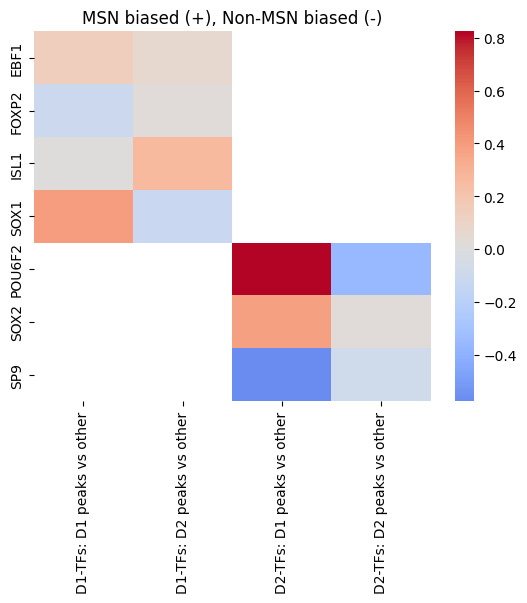

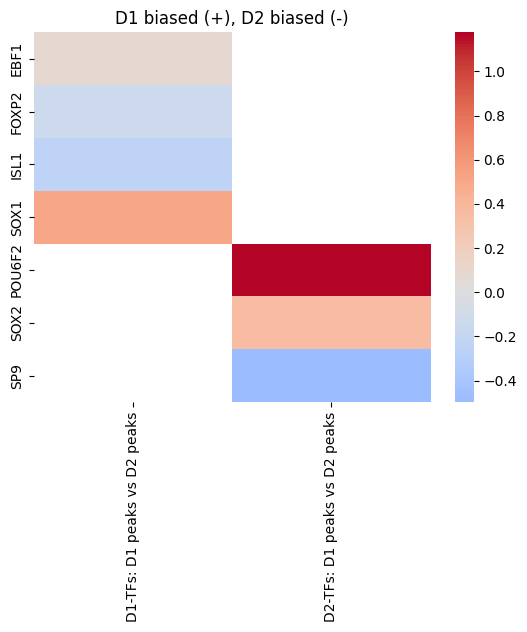

In [364]:
seaborn.heatmap(enrich_vs_other,cmap='coolwarm',center=0)
plt.title('MSN biased (+), Non-MSN biased (-)')
plt.show()
seaborn.heatmap(enrich_between,cmap='coolwarm',center=0)
plt.title('D1 biased (+), D2 biased (-)')
plt.show()

In [365]:
enrich_vs_other

,D1-TFs: D1 peaks vs other,D1-TFs: D2 peaks vs other,D2-TFs: D1 peaks vs other,D2-TFs: D2 peaks vs other
EBF1,0.137763,0.059107,NaN,NaN
FOXP2,-0.105858,0.021936,NaN,NaN
ISL1,0.013540,0.256811,NaN,NaN
SOX1,0.396711,-0.119009,NaN,NaN
POU6F2,NaN,NaN,0.824380,-0.352652
SOX2,NaN,NaN,0.385234,0.023777
SP9,NaN,NaN,-0.575565,-0.079041


In [366]:
enrich_between

,D1-TFs: D1 peaks vs D2 peaks,D2-TFs: D1 peaks vs D2 peaks
EBF1,0.078657,NaN
FOXP2,-0.127794,NaN
ISL1,-0.243271,NaN
SOX1,0.515721,NaN
POU6F2,NaN,1.177032
SOX2,NaN,0.361456
SP9,NaN,-0.496525


In [367]:
sub_fimo_tab_d1.loc[sub_fimo_tab_d1['motif_TF'].isin(d1_tfs)].groupby('sequence_name')['motif_TF'].value_counts().unstack().fillna(0).mean(0).sum() / sub_fimo_tab_d1.loc[sub_fimo_tab_d1['motif_TF'].isin(d2_tfs)].groupby('sequence_name')['motif_TF'].value_counts().unstack().fillna(0).mean(0).sum()

1.1220159151193632

In [368]:
sub_fimo_tab_d2.loc[sub_fimo_tab_d2['motif_TF'].isin(d1_tfs)].groupby('sequence_name')['motif_TF'].value_counts().unstack().fillna(0).mean(0).sum()/sub_fimo_tab_d2.loc[sub_fimo_tab_d2['motif_TF'].isin(d2_tfs)].groupby('sequence_name')['motif_TF'].value_counts().unstack().fillna(0).mean(0).sum()

1.204950065132436